In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

In [127]:
df = pd.read_csv('C:/Users/sdat7/home/predict stock/005930.KS.csv')
data = pd.DataFrame(df, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
data = data.dropna(axis=0)

In [128]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1220,False,False,False,False,False,False,False
1221,False,False,False,False,False,False,False
1222,False,False,False,False,False,False,False
1223,False,False,False,False,False,False,False


In [129]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-01,23040.0,23260.0,23020.0,23260.0,20224.972656,12998950.0
1,2016-02-02,23220.0,23320.0,22940.0,23120.0,20103.240234,8317400.0
2,2016-02-03,23000.0,23040.0,22740.0,22920.0,19929.335938,8725350.0
3,2016-02-04,23000.0,23220.0,22960.0,23120.0,20103.240234,12397950.0
4,2016-02-05,23120.0,23380.0,23120.0,23280.0,20242.369141,9404700.0


In [130]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [136]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [137]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1050, 52, 1), (117, 52, 1))

In [147]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 52, 50)            10400     
_________________________________________________________________
lstm_29 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
105/105 [==============================] - 6s 60ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 2/20
105/105 [==============================] - 5s 45ms/step - loss: 8.9410e-04 - val_loss: 0.0037
Epoch 3/20
105/105 [==============================] - 4s 42ms/step - loss: 6.4224e-04 - val_loss: 0.0011
Epoch 4/20
105/105 [==============================] - 4s 43ms/step - loss: 4.8161e-04 - val_loss: 0.0011
Epoch 5/20
105/105 [==============================] - 5s 45ms/step - loss: 3.9131e-04 - val_loss: 7.2730e-04
Epoch 6/20
105/105 [==============================] - 5s 44ms/step - loss: 3.1346e-04 - val_loss: 5.0044e-04
Epoch 7/20
105/105 [==============================] - 5s 44ms/step - loss: 2.8161e-04 - val_loss: 5.3744e-04
Epoch 8/20
105/105 [==============================] - 4s 42ms/step - loss: 2.7624e-04 - val_loss: 6.4717e-04
Epoch 9/20
105/105 [==============================] - 5s 44ms/step - loss: 2.6698e-04 - val_loss: 0.0011
Epoch 10/20
105/105 [======================

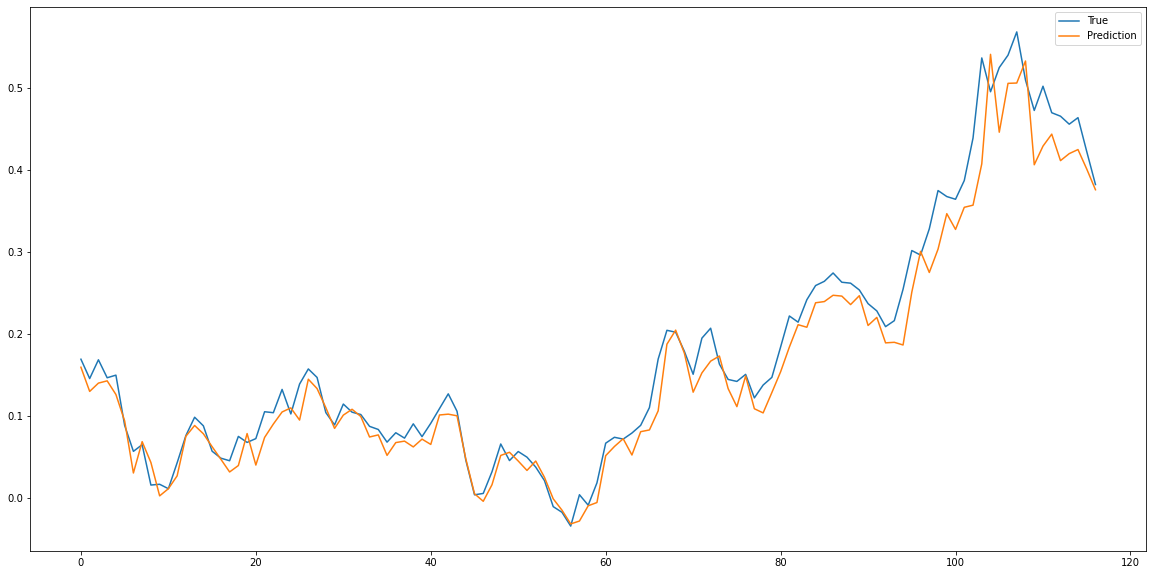

In [149]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()